In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [28]:
print(df.dtypes)


Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [29]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
print(df.dtypes)


Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [30]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество')


Вывести несколько первых строк сгруппированных данных

In [31]:
print(grouped_df.head(10))

        Дата  Количество
0 2018-01-04        1840
1 2018-01-05        1301
2 2018-01-06        1306
3 2018-01-07        1322
4 2018-01-09        1719
5 2018-01-10        1487
6 2018-01-11        1471
7 2018-01-12        1492
8 2018-01-13        1475
9 2018-01-14        1477


Нарисуйте график продаж у `grouped_df`

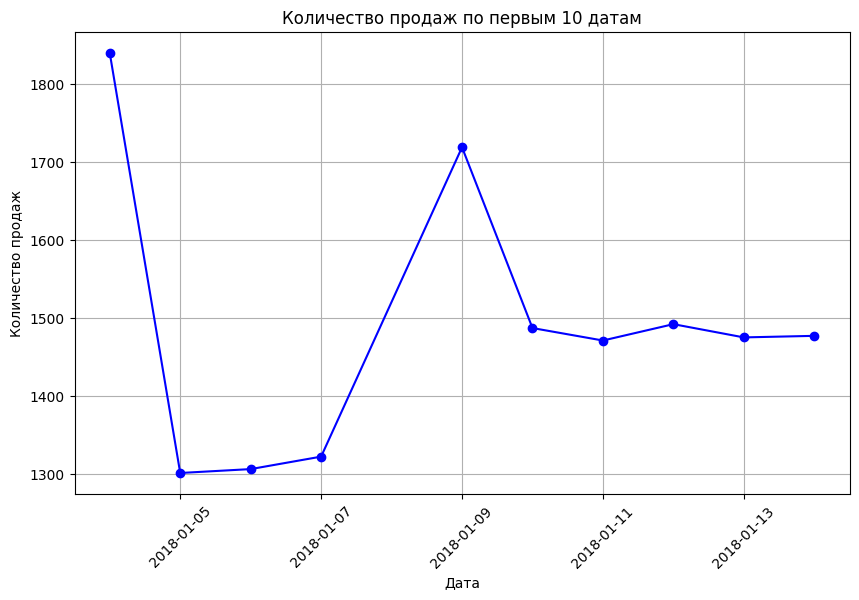

In [32]:
grouped_df_top10 = grouped_df.head(10)

plt.figure(figsize=(10, 6))
plt.plot(grouped_df_top10['Дата'], grouped_df_top10['Количество'], marker='o', color='b', linestyle='-')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.title('Количество продаж по первым 10 датам')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Опишите что вы видите на графике. Ваша задача - максимально описать график

если выводить по всем датам, то график становится совсем нечитабельным, поэтому мы вывели график по первым 10 датам. Если обратить внимание на даты, то продажи сгруппированы именно по числам(в нашем графике по числам января). Можно увидеть что продажи непостоянны, т.к. 4ого числа продаж более 1800 но уже 5ого числа они резко снизились до 1300 и в этом радиусе пробыли еще два дня, после чего на 9ое число они снова выростают до пределов 1700. С 10 числа продажи снова падают до порядка 1400 и стабильно днржаться в этом диапозоне в следующие дни

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [33]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[df['Количество'] > upper_bound]

max_outlier = outliers.loc[outliers['Количество'].idxmax()]

print(max_outlier)


Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [34]:
df['Месяц'] = df['Дата'].dt.month
df['День недели'] = df['Дата'].dt.dayofweek  # 2 соответствует среде
print(df.head())

        Дата  Склад Контрагент Номенклатура  Количество  Месяц  День недели
0 2018-01-04      1  address_0    product_0           4      1            3
1 2018-01-04      1  address_0    product_1           4      1            3
2 2018-01-04      1  address_0    product_2           5      1            3
3 2018-01-04      1  address_0    product_3          10      1            3
4 2018-01-04      1  address_0    product_4           2      1            3


In [35]:
grouped_sales = df[df['Склад'] == 3].groupby('Месяц')['Количество'].sum()
print(grouped_sales)

Месяц
1    17767
2    19021
3    20462
4    20194
5    24594
6    22399
7    23698
8    26481
Name: Количество, dtype: int64


In [36]:
# Выводим уникальные месяцы
print(df['Месяц'].unique())


[1 2 3 4 5 6 7 8]


In [37]:
filtered_df = df[(df['Склад'] == 3) &
                 (df['Месяц'].isin([6, 7, 8])) &
                 (df['День недели'] == 2)]

# Если после фильтрации нет данных, выводим сообщение
if filtered_df.empty:
    print("Нет данных для указанного фильтра.")
else:
    # Группируем по 'Номенклатура' и суммируем 'Количество'
    top_product = filtered_df.groupby('Номенклатура')['Количество'].sum().idxmax()

    # Выводим результат
    print("Топовый товар по продажам по средам за июнь, июль, август на складе 3:", top_product)

Топовый товар по продажам по средам за июнь, июль, август на складе 3: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [39]:
df['Год'] = df['Дата'].dt.year

print(df['Год'].unique())

[2018]


In [40]:
print(df.tail(5))


             Дата  Склад   Контрагент Номенклатура  Количество  Месяц  \
301350 2018-08-31      5  address_173   product_15           0      8   
301351 2018-08-31      5  address_173   product_17           1      8   
301352 2018-08-31      5  address_173   product_18           1      8   
301353 2018-08-31      5  address_173   product_19           0      8   
301354 2018-08-31      5  address_173   product_20           2      8   

        День недели   Год  
301350            4  2018  
301351            4  2018  
301352            4  2018  
301353            4  2018  
301354            4  2018  


In [50]:
weather_df = pd.read_excel('weather.xls', skiprows=6)
weather_df.tail()


,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
1945,01.01.2018 14:00,-6.7,747.5,781.6,-0.5,48.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,...,NaN,NaN,10.0,-15.9,NaN,NaN,NaN,NaN,NaN,NaN
1946,01.01.2018 11:00,-8.5,748.0,782.4,-0.3,55.0,"Ветер, дующий с юго-востока",1,NaN,NaN,...,NaN,NaN,10.0,-16.1,NaN,NaN,NaN,NaN,NaN,NaN
1947,01.01.2018 08:00,-11.1,748.3,783.0,-0.2,62.0,"Ветер, дующий с востока",1,NaN,NaN,...,NaN,NaN,10.0,-17.1,NaN,NaN,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,18
1948,01.01.2018 05:00,-10.8,748.5,783.1,0.1,62.0,"Ветер, дующий с востока",1,NaN,NaN,...,NaN,NaN,NaN,-16.7,NaN,NaN,NaN,NaN,NaN,NaN
1949,01.01.2018 02:00,-10.4,748.4,783.0,-0.3,78.0,"Ветер, дующий с юга",1,NaN,NaN,...,NaN,NaN,NaN,-13.6,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
weather_df = weather_df.iloc[:, :2] # only 2 cols

weather_df = weather_df.rename(columns={'Местное время в Астане': 'Дата'})

weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format='%d.%m.%Y %H:%M')

weather_df['Дата'] = pd.to_datetime(weather_df['Дата']).dt.date

weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format='%d-%m-%Y')

weather_df = weather_df.groupby('Дата', as_index=False).mean()

weather_df.dtypes

,0
Дата,datetime64[ns]
T,float64


In [55]:
weather_df

,Дата,T
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.0750
4,2018-01-05,-16.8625
...,...,...
239,2018-08-28,14.1125
240,2018-08-29,13.8250
241,2018-08-30,14.1750
242,2018-08-31,11.0250


<Axes: xlabel='Дата'>

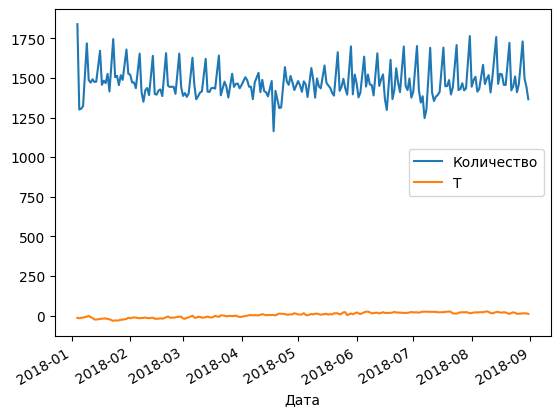

In [56]:
weather_df = weather_df.merge(grouped_df, on='Дата')

weather_df.plot(x='Дата', y=['Количество', 'T'])


<Axes: xlabel='Дата'>

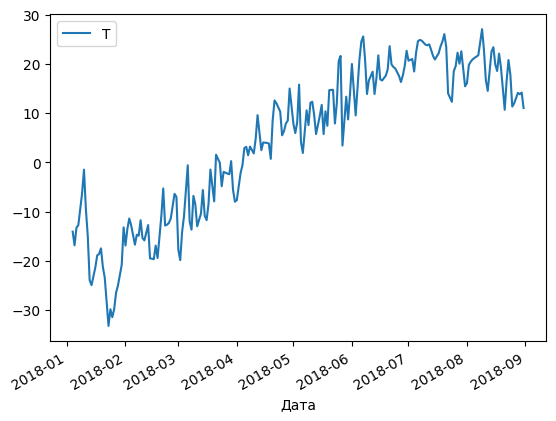

In [57]:
weather_df.plot(x='Дата', y='T')